Columns: ['13', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13']
         13 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7  \
506                                                                             
CRIM     ZN      INDUS       CHAS        NOX         RM        AGE        DIS   
0.00632  18       2.31          0      0.538      6.575       65.2       4.09   
0.02731   0       7.07          0      0.469      6.421       78.9     4.9671   
0.02729   0       7.07          0      0.469      7.185       61.1     4.9671   
0.03237   0       2.18          0      0.458      6.998       45.8     6.0622   

        Unnamed: 8 Unnamed: 9 Unnamed: 10 Unnamed: 11 Unnamed: 12 Unnamed: 13  
506                                                                            
CRIM           RAD        TAX     PTRATIO           B       LSTAT        MEDV  
0.00

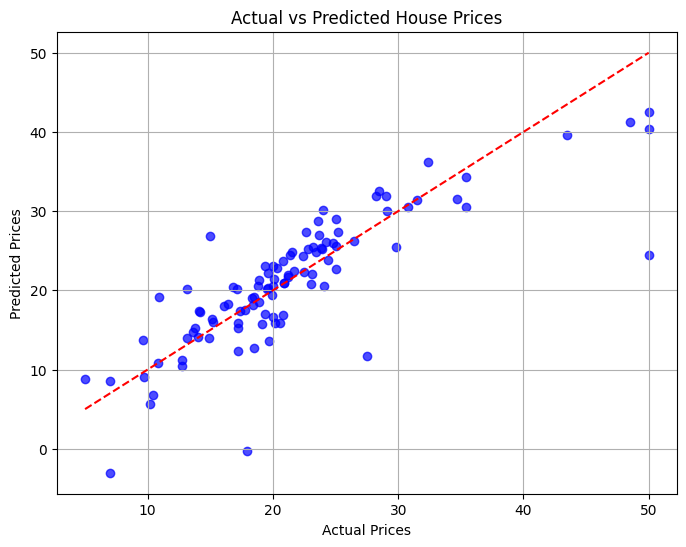

In [3]:
# 04_model_evaluation.ipynb

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset (skip the first column if it's an extra index)
df = pd.read_csv('BostonHousing.csv', index_col=0)  # <- this fixes the '506' first column issue

# Display first rows and columns
print("Columns:", df.columns.tolist())
print(df.head())

# Ensure all columns are numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop missing values
df = df.dropna()

# Set target column (Boston Housing dataset: last column is usually MEDV)
target_column = df.columns[-1]  # automatically pick the last column as target

# Features and target
X = df.drop(target_column, axis=1)
y = df[target_column]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R² Score: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

# Plot Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # ideal line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()
